# 1.Autoencoder

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
tfkl = tfk.layers


In [2]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()
train_X = train_X.astype("float") / 255.0
test_X = test_X.astype("float") / 255.0
print(f"train_X: {train_X.shape}, test_X = {test_X.shape}")


170500096/170498071 [==============================] - 2s 0us/step
train_X: (50000, 32, 32, 3), test_X = (10000, 32, 32, 3)


In [10]:
print(np.prod((32, 32, 3)))

3072


In [55]:
encoder = tfk.Sequential([
    tfkl.InputLayer((32, 32, 3)),
    tfkl.Conv2D(64,(3,3), activation=tf.nn.relu, padding="same"),
    tfkl.MaxPooling2D((2,2), padding="same"),
    tfkl.Conv2D(32,(3,3), activation=tf.nn.relu, padding="same"),
    tfkl.MaxPooling2D((2,2), padding="same"),
])

encoder.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 32)          0         
Total params: 20,256
Trainable params: 20,256
Non-trainable params: 0
_________________________________________________________________


In [56]:

decoder = tfk.Sequential([
    tfkl.InputLayer((8, 8, 32)),
    tfkl.Conv2D(32,(3, 3), activation=tf.nn.relu, padding="same"),
    tfkl.UpSampling2D((2, 2)),
    tfkl.Conv2D(64, (3, 3), activation=tf.nn.relu, padding="same"),
    tfkl.UpSampling2D((2, 2)),
    tfkl.Conv2D(3, (3, 3), activation=tf.nn.relu, padding="same")
])

decoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
up_sampling2d_30 (UpSampling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
up_sampling2d_31 (UpSampling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 32, 3)         1731      
Total params: 29,475
Trainable params: 29,475
Non-trainable params: 0
_________________________________________________________________


In [57]:
# the tf.keras function API starts with defining placeholder tensors that represent model inputs
x = tfkl.Input((32, 32, 3))

# we can then pass this placeholder through our models to specify the computation to get a prediction
h = encoder(x)
xhat = decoder(h)

# finally we use the tfk.Model class instantiate the model by specifying the inputs and outputs
# (note: this can also be lists, which is how you make more complex models with multiple inputs and/or outputs)
autoencoder = tfk.Model(inputs=x, outputs=xhat)
autoencoder.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
sequential_17 (Sequential)   (None, 8, 8, 32)          20256     
_________________________________________________________________
sequential_18 (Sequential)   (None, 32, 32, 3)         29475     
Total params: 49,731
Trainable params: 49,731
Non-trainable params: 0
_________________________________________________________________


In [58]:
# training happens as usual
autoencoder.compile(
    optimizer=tfk.optimizers.Adam(),
    loss=tfk.losses.BinaryCrossentropy(),
)

results = autoencoder.fit(train_X,train_X, 
                          steps_per_epoch=50, 
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(test_X, test_X))

Epoch 1/10
50/50 [==============================] - 84s 2s/step - loss: 0.8770 - val_loss: 0.6361
Epoch 2/10
50/50 [==============================] - 85s 2s/step - loss: 0.6079 - val_loss: 0.5910
Epoch 3/10
50/50 [==============================] - 85s 2s/step - loss: 0.5840 - val_loss: 0.5807
Epoch 4/10
50/50 [==============================] - 84s 2s/step - loss: 0.5804 - val_loss: 0.5794
Epoch 5/10
50/50 [==============================] - 87s 2s/step - loss: 0.5762 - val_loss: 0.5778
Epoch 6/10
50/50 [==============================] - 85s 2s/step - loss: 0.5768 - val_loss: 0.5755
Epoch 7/10
50/50 [==============================] - 85s 2s/step - loss: 0.5730 - val_loss: 0.5724
Epoch 8/10
50/50 [==============================] - 85s 2s/step - loss: 0.5766 - val_loss: 0.5728
Epoch 9/10
50/50 [==============================] - 85s 2s/step - loss: 0.5700 - val_loss: 0.5706
Epoch 10/10
50/50 [==============================] - 85s 2s/step - loss: 0.5696 - val_loss: 0.5698


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


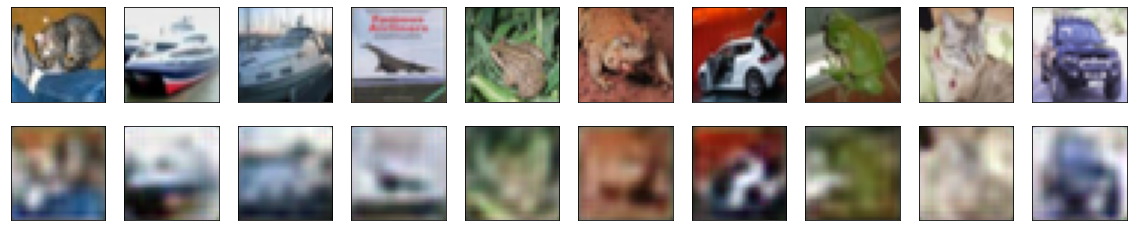

In [59]:
decoded_imgs = autoencoder.predict(test_X)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2. Image Classification
## 2.1 Deep CNN  

Kernel size = 3 x 3  
strides = 1 (sliding window)  
padding = valid (no padding to the input and the output shape inevitably must be smaller than the input shape)   
network depth = 7

In [69]:
from keras.utils import to_categorical
# one hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [81]:
from tensorflow.keras.models import Sequential
# Set up the neural network
model = Sequential()
model.add(tfkl.InputLayer((32,32,3)))

model.add(tfkl.Conv2D(filters=32, kernel_size=(3,3),strides=1,
                 padding='same',activation='relu'))
model.add(tfkl.MaxPooling2D(pool_size=(2, 2)))
model.add(tfkl.Dropout(0.3))

model.add(tfkl.Conv2D(filters=64, kernel_size=(3,3),strides=1,
                 padding='same',activation='relu'))
model.add(tfkl.MaxPooling2D(pool_size=(2, 2)))
model.add(tfkl.Dropout(0.3))

model.add(tfkl.Conv2D(filters=128, kernel_size=(3,3),strides=1,
                 padding='same',activation='relu'))
model.add(tfkl.MaxPooling2D(pool_size=(2, 2)))
model.add(tfkl.Dropout(0.3))

# following layer
model.add(tfkl.Flatten())
model.add(tfkl.Dense(128, activation='relu'))
model.add(tfkl.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 8, 8, 128)       

In [85]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',metrics=['accuracy'])

results2 = model.fit(train_X, train_y, 
          steps_per_epoch=100,
          epochs=10, 
          batch_size = 128,
          validation_data=(test_X, test_y))

Epoch 1/10
100/100 [==============================] - 33s 330ms/step - loss: 1.2420 - accuracy: 0.5617 - val_loss: 1.1451 - val_accuracy: 0.5978
Epoch 2/10
100/100 [==============================] - 33s 329ms/step - loss: 1.1966 - accuracy: 0.5769 - val_loss: 1.1150 - val_accuracy: 0.6114
Epoch 3/10
100/100 [==============================] - 33s 328ms/step - loss: 1.1594 - accuracy: 0.5874 - val_loss: 1.0995 - val_accuracy: 0.6161
Epoch 4/10
100/100 [==============================] - 33s 327ms/step - loss: 1.1296 - accuracy: 0.6017 - val_loss: 1.0243 - val_accuracy: 0.6436
Epoch 5/10
100/100 [==============================] - 33s 328ms/step - loss: 1.0865 - accuracy: 0.6120 - val_loss: 1.0095 - val_accuracy: 0.6436
Epoch 6/10
100/100 [==============================] - 33s 328ms/step - loss: 1.0880 - accuracy: 0.6166 - val_loss: 0.9696 - val_accuracy: 0.6650
Epoch 7/10
100/100 [==============================] - 33s 328ms/step - loss: 1.0521 - accuracy: 0.6282 - val_loss: 0.9486 - val_ac

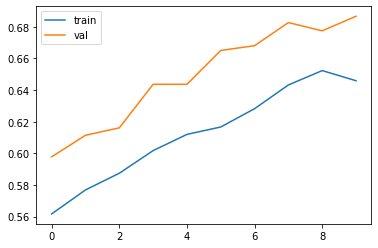

In [87]:
plt.plot(results2.history["accuracy"])
plt.plot(results2.history["val_accuracy"])
plt.legend(labels=["train", "val"])

In [88]:
test_score = model.evaluate(test_X, test_y)
train_score = model.evaluate(train_X, train_y)
print('The test set accuracy of model:',test_score[1])
print('The training set accuracy of model:',train_score[1])


1563/1563 [==============================] - 34s 21ms/step - loss: 0.8457 - accuracy: 0.7093
The test set accuracy of model: 0.6866000294685364
The training set accuracy of model: 0.7092599868774414


## 2.2 Transfer Learning


In [89]:
from keras.applications import VGG16


In [90]:

conv_base = VGG16(weights = 'imagenet', 
                  include_top = False, 
                  input_shape = (32,32,3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [92]:
model = Sequential()
model.add(conv_base)
model.add(tfkl.Flatten())
model.add(tfkl.Dense(128, activation='relu'))
model.add(tfkl.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',metrics=['accuracy'])

results3 = model.fit(train_X, train_y, 
          steps_per_epoch=10,
          epochs=10, 
          batch_size = 128,
          validation_data=(test_X, test_y))

Epoch 1/10
10/10 [==============================] - 210s 21s/step - loss: 2.4922 - accuracy: 0.0992 - val_loss: 2.3318 - val_accuracy: 0.1000
Epoch 2/10
10/10 [==============================] - 210s 21s/step - loss: 2.3235 - accuracy: 0.0883 - val_loss: 2.3171 - val_accuracy: 0.1000
Epoch 3/10
10/10 [==============================] - 210s 21s/step - loss: 2.2998 - accuracy: 0.1203 - val_loss: 2.3676 - val_accuracy: 0.1015
Epoch 4/10
10/10 [==============================] - 209s 21s/step - loss: 2.3216 - accuracy: 0.0969 - val_loss: 2.2986 - val_accuracy: 0.1000
Epoch 5/10
10/10 [==============================] - 213s 21s/step - loss: 2.2507 - accuracy: 0.1703 - val_loss: 2.1975 - val_accuracy: 0.1435
Epoch 6/10
10/10 [==============================] - 213s 21s/step - loss: 2.0964 - accuracy: 0.1961 - val_loss: 2.4147 - val_accuracy: 0.1172
Epoch 7/10
10/10 [==============================] - 208s 21s/step - loss: 2.1604 - accuracy: 0.1719 - val_loss: 2.0621 - val_accuracy: 0.1783
Epoch 

1563/1563 [==============================] - 534s 342ms/step - loss: 1.8625 - accuracy: 0.2284
The test set accuracy of model: 0.22589999437332153
The training set accuracy of model: 0.22844000160694122


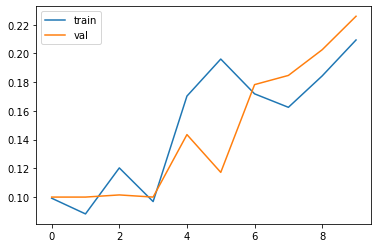

In [96]:
plt.plot(results3.history["accuracy"])
plt.plot(results3.history["val_accuracy"])
plt.legend(labels=["train", "val"])

test_score = model.evaluate(test_X, test_y)
train_score = model.evaluate(train_X, train_y)
print('The test set accuracy of model:',test_score[1])
print('The training set accuracy of model:',train_score[1])


#### Note: The  accuracy get much worse by transfer learning, because I changed the several parameters here, such as steps_per_epoch for avoiding too long processing time. It is really time consuming. 

# 3. Text Classification

## 3.1 RNN

